In [1]:
import pandas as pd
import numpy as np
import os, glob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
folder = '4uav_simulations'
file_name = 'summary_num_uavs_simulation'
file = str(folder+'/'+file_name+'.txt')
df = pd.read_csv(file, delimiter = ",")

In [3]:
df.head()

,exec_time,NUM_UAVS,MODE,ALWAYS_COMMUNICATION,total_iter,total_cov_area,average_inst_cov_area,mission_time
0,54847.62,4,unique,False,337,95.08,11.24,67.4
1,54887.83,4,unique,False,190,95.04,11.61,38.0
2,54922.88,4,unique,False,167,95.04,11.51,33.4
3,54977.02,4,unique,False,235,95.00,11.38,47.0
4,55034.64,4,unique,False,341,95.00,11.22,68.2


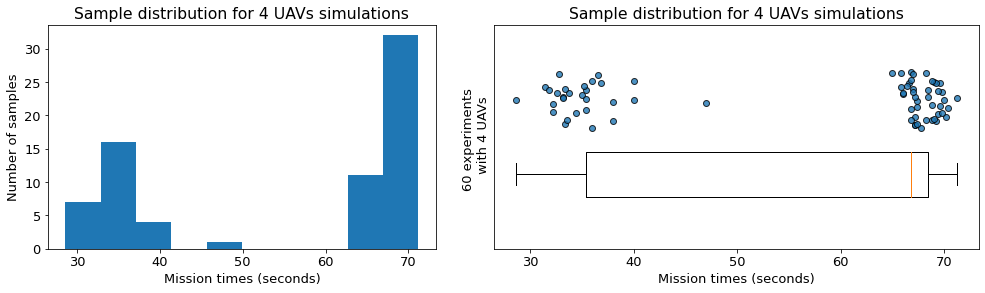

In [94]:
average = df.groupby('NUM_UAVS').mean()
arr = np.array(list(df['mission_time']))

plt.rcParams.update({'font.size': 13})

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14,4),
                        gridspec_kw={'width_ratios': [4,5]})
fig.tight_layout(pad=1.5)

axs[0].set_title("Sample distribution for 4 UAVs simulations")
axs[0].set_xlabel("Mission times (seconds)")
axs[0].set_ylabel("Number of samples")
axs[0].hist(arr)

y = np.array(len(arr)*[1])
noise = np.random.uniform(low=-0.1,high=0.1,size=len(arr))
axs[1].set_title("Sample distribution for 4 UAVs simulations")
axs[1].set_xlabel("Mission times (seconds)")
axs[1].set_ylabel("60 experiments \n with 4 UAVs")
axs[1].boxplot(arr, vert=False)
axs[1].set_yticks([])
axs[1].scatter(arr,y+noise+0.25, edgecolor='black', alpha=0.8)
axs[1].set_ylim(0.75,1.5)

plt.savefig('num-uavs-outliers-analysis.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()

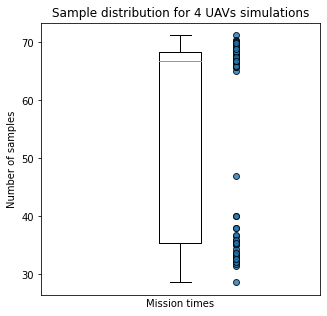

In [43]:

plt.show()